In [13]:
# Dependencies
import json
from pprint import pprint
from datetime import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from config import (consumer_key, consumer_secret,
                    access_token, access_token_secret)

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

In [9]:
# Target user
target_list = ['@BBCNews', '@CBS', '@CNN', '@FoxNews', '@nytimes']

# Create list of dictionaries
sentiment = []

tweet_count = 1

for target_user in target_list:
    
    # Paginate through 5 pages
    for x in range(5):
       
        # Get all tweets from home feed (for each page specified)
        public_tweets = api.user_timeline(target_user, page=x)
        
        # Loop through all tweets
        for tweet in public_tweets:
            
            # Grab tweet data
            name = tweet['user']['name']
            tweet_text = tweet['text']
            date = tweet['created_at']
            
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            positive = results['pos']
            neutral = results['neu']
            negative = results['neg']
            
            # Track tweet count
            tweets_ago = tweet_count
            
            # Create dictionary holding tweet data
            tweet_dict = {'Media Source': name, 'Tweet': tweet_text, 'Date': date, 'Compound': compound, 
                          'Positive': positive, 'Neutral': neutral, 'Negative': negative, 'Tweets Ago': tweet_count}
            
            # Only count up to 100 for each target user
            if tweets_ago == 100:
                # Reset tweet counter
                tweet_count = 1
            else:
                tweet_count += 1
            
            # Append tweet dictionary to sentiment list
            sentiment.append(tweet_dict)

In [42]:
# Create dataframe
media_tweets = pd.DataFrame(sentiment)

# Reorder columns
media_tweets = media_tweets.iloc[:,[2,6,1,0,5,4,3,7]]

# Grab datetime to interpolate into csv name
# today = dt.now().strftime('%Y%m%d') 

# Save to csv
media_tweets.to_csv('tweet_data/news_sentiment.csv', encoding='utf-8', index=False)
media_tweets

,Media Source,Tweet,Date,Compound,Positive,Neutral,Negative,Tweets Ago
0,BBC News (UK),Russian spy: Rudd to chair Cobra after crime s...,Sat Mar 10 05:33:11 +0000 2018,-0.5423,0.000,0.741,0.259,1
1,BBC News (UK),High staff sickness at troubled Powys children...,Sat Mar 10 04:46:37 +0000 2018,-0.4588,0.000,0.727,0.273,2
2,BBC News (UK),No ban for Southend music teacher who gave gir...,Sat Mar 10 04:11:55 +0000 2018,-0.7003,0.000,0.633,0.367,3
3,BBC News (UK),'Poo-shaming' map hopes to tackle dog fouling ...,Sat Mar 10 04:11:55 +0000 2018,0.4215,0.286,0.714,0.000,4
4,BBC News (UK),St Ives honours its World War One poet pilot h...,Sat Mar 10 04:11:55 +0000 2018,-0.1779,0.212,0.530,0.258,5
5,BBC News (UK),Former miners wrongly told they owe thousands ...,Sat Mar 10 04:11:55 +0000 2018,0.0000,0.000,1.000,0.000,6
6,BBC News (UK),Winter Paralympics: Millie Knight and Brett Wi...,Sat Mar 10 03:50:50 +0000 2018,0.5859,0.275,0.725,0.000,7
7,BBC News (UK),Westminster attack PC Keith Palmer awarded for...,Sat Mar 10 03:50:50 +0000 2018,0.4215,0.393,0.400,0.207,8
8,BBC News (UK),Damian Hinds to cut workload to tackle teacher...,Sat Mar 10 02:44:57 +0000 2018,-0.4767,0.000,0.661,0.339,9
9,BBC News (UK),"Saturday's I Weekend: ""Nuclear gamble with N K...",Fri Mar 09 22:17:59 +0000 2018,0.0258,0.084,0.916,0.000,10


# Sentiment Analysis of Media Tweets

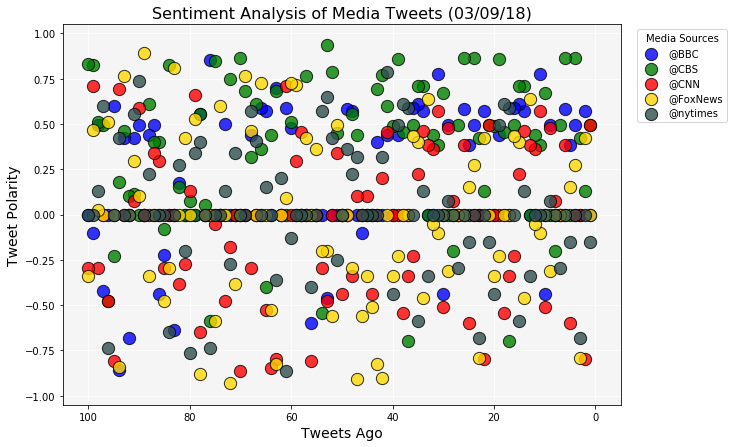

In [155]:
# Set axes
tweets_ago = media_tweets['Tweets Ago']
bbc = media_tweets['@BBC']
cbs = media_tweets['@CBS']
cnn = media_tweets['@CNN']
fox = media_tweets['@FoxNews']
nyt = media_tweets['@nytimes']

# Set figure size
plt.figure(figsize=(10, 7))

# Plot
bbc_plot = plt.scatter(tweets_ago, bbc, facecolors='b', edgecolors='black', s=150, alpha=0.8, label="@BBC")
cbs_plot = plt.scatter(tweets_ago, cbs, facecolors='g', edgecolors='black', s=150, alpha=0.8, label="@CBS")
cnn_plot = plt.scatter(tweets_ago, cnn, facecolors='r', edgecolors='black', s=150, alpha=0.8, label="@CNN")
fox_plot = plt.scatter(tweets_ago, fox, facecolors='gold', edgecolors='black', s=150, alpha=0.8, label="@FoxNews")
nyt_plot = plt.scatter(tweets_ago, nyt, facecolors='darkslategray', edgecolors='black', s=150, alpha=0.8, label="@nytimes")

# Set limits
plt.xlim(105, -5)
plt.ylim(-1.05, 1.05)

# Set axes background color
ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Insert grid lines and set behind plot elements
ax.grid(color='white')
ax.set_axisbelow(True)

# Specify max number of ticks in x-axis
plt.locator_params(axis='y', numticks=1)

# Labels
plt.title('Sentiment Analysis of Media Tweets (03/09/18)', fontsize=16)
plt.xlabel('Tweets Ago', fontsize=14)
plt.ylabel('Tweet Polarity', fontsize=14)

# Legend
plt.legend(handles=[bbc_plot, cbs_plot, cnn_plot, fox_plot, nyt_plot], title='Media Sources', loc=1, bbox_to_anchor=(1.2, 1))

# Save image and show
plt.show()

# Overall Media Sentiment Based on Twitter
